<a href="https://colab.research.google.com/github/fitrinaulia/fitrinaulia.github.io/blob/main/EDA_Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA - Exploratory Data Analysis in Covid 19 Dataset (Python)
EDA is applied to investigate the data and summarize the key insights. It is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.

In this project, I would like to perform basic EDA which contains:
1. Load data
2. Data cleaning
3. Plot and analysis

The data used in this project is COVID-19 Coronavirus Pandemic Dataset which is retrieved from https://www.worldometers.info/coronavirus/

### 1. Importing the required libraries for EDA

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 2. Load the data

In [4]:
df_covid = pd.read_csv('Covid Live.csv')
#display the top 5 rows
df_covid.head()

,#,"Country,\nOther",Total\nCases,Total\nDeaths,New\nDeaths,Total\nRecovered,Active\nCases,"Serious,\nCritical",Tot Cases/\n1M pop,Deaths/\n1M pop,Total\nTests,Tests/\n1M pop,Population
0,1,USA,"98,166,904","1,084,282",NaN,"94,962,112","2,120,510","2,970","293,206","3,239","1,118,158,870","3,339,729","334,805,269"
1,2,India,"44,587,307","528,629",NaN,"44,019,095","39,583",698,"31,698",376,"894,416,853","635,857","1,406,631,776"
2,3,France,"35,342,950","155,078",NaN,"34,527,115","660,757",869,"538,892","2,365","271,490,188","4,139,547","65,584,518"
3,4,Brazil,"34,706,757","686,027",NaN,"33,838,636","182,094","8,318","161,162","3,186","63,776,166","296,146","215,353,593"
4,5,Germany,"33,312,373","149,948",NaN,"32,315,200","847,225","1,406","397,126","1,788","122,332,384","1,458,359","83,883,596"


### 3. Dealing with problem
- Number inside this dataset contains commas. We need to remove them to make the data accessible for analysis.
- Missing value in column 'New Death' is assumed zero. Other missing values will be replaced with mean.

**Number with comma**

In [5]:
#renaming columns
df_covid.columns = ['ID', 'Country', 'TotalCases', 'TotalDeath', 'NewDeath', 'TotalRecovered', 'ActiveCases', 'SeriousCritical', 'TotCases1Mpop', 'Deaths1Mpop', 'TotalTests',' Tests1Mpop', 'Population']
df_covid = df_covid.set_index('ID')
df_covid.columns

Index(['Country', 'TotalCases', 'TotalDeath', 'NewDeath', 'TotalRecovered',
       'ActiveCases', 'SeriousCritical', 'TotCases1Mpop', 'Deaths1Mpop',
       'TotalTests', ' Tests1Mpop', 'Population'],
      dtype='object')

In [6]:
#removing commas inside the number
df_covid.dtypes
column = df_covid.select_dtypes(include = 'object').columns
column = column[column != 'Country']

for i in column:
  df_covid[i] = df_covid[i].str.replace(",", "").astype(float)

df_covid.head()

,Country,TotalCases,TotalDeath,NewDeath,TotalRecovered,ActiveCases,SeriousCritical,TotCases1Mpop,Deaths1Mpop,TotalTests,Tests1Mpop,Population
ID,,,,,,,,,,,,
1,USA,98166904.0,1084282.0,NaN,94962112.0,2120510.0,2970.0,293206.0,3239.0,1.118159e+09,3339729.0,3.348053e+08
2,India,44587307.0,528629.0,NaN,44019095.0,39583.0,698.0,31698.0,376.0,8.944169e+08,635857.0,1.406632e+09
3,France,35342950.0,155078.0,NaN,34527115.0,660757.0,869.0,538892.0,2365.0,2.714902e+08,4139547.0,6.558452e+07
4,Brazil,34706757.0,686027.0,NaN,33838636.0,182094.0,8318.0,161162.0,3186.0,6.377617e+07,296146.0,2.153536e+08
5,Germany,33312373.0,149948.0,NaN,32315200.0,847225.0,1406.0,397126.0,1788.0,1.223324e+08,1458359.0,8.388360e+07


**Missing values**

In [7]:
df_covid.isnull().sum()

Country              0
TotalCases           0
TotalDeath           5
NewDeath           227
TotalRecovered      16
ActiveCases         15
SeriousCritical     83
TotCases1Mpop        2
Deaths1Mpop          7
TotalTests          16
 Tests1Mpop         16
Population           2
dtype: int64

In [8]:
#replacing NaN value in 'NewDeath' column
df_covid['NewDeath'].fillna(0, inplace=True)

In [9]:
#dealing with other columns
column = df_covid.columns
column = column.drop(['Country', 'TotalCases', 'NewDeath'])

#replacing with mean
for i in column:
  x = df_covid[i].mean()
  df_covid[i].fillna(x, inplace=True)

df_covid.isnull().sum()

Country            0
TotalCases         0
TotalDeath         0
NewDeath           0
TotalRecovered     0
ActiveCases        0
SeriousCritical    0
TotCases1Mpop      0
Deaths1Mpop        0
TotalTests         0
 Tests1Mpop        0
Population         0
dtype: int64

### 4. Plots and summary

In [10]:
df_covid.describe()

,TotalCases,TotalDeath,NewDeath,TotalRecovered,ActiveCases,SeriousCritical,TotCases1Mpop,Deaths1Mpop,TotalTests,Tests1Mpop,Population
count,2.300000e+02,2.300000e+02,230.000000,2.300000e+02,2.300000e+02,230.000000,230.000000,230.000000,2.300000e+02,2.300000e+02,2.300000e+02
mean,2.705969e+06,2.909820e+04,0.234783,2.807255e+06,5.744895e+04,270.224490,179621.846491,1197.968610,3.137011e+07,2.050888e+06,3.484620e+07
std,8.779899e+06,1.010917e+05,2.835614,8.501757e+06,2.004752e+05,736.746974,181574.374660,1227.784889,1.103852e+08,3.366370e+06,1.383153e+08
min,9.000000e+00,1.000000e+00,0.000000,2.000000e+00,0.000000e+00,1.000000,16.000000,2.000000,5.117000e+03,5.091000e+03,7.990000e+02
25%,2.364900e+04,2.160000e+02,0.000000,2.449950e+04,1.700000e+02,10.000000,17017.500000,174.250000,4.007550e+05,1.968250e+05,5.476582e+05
50%,2.037110e+05,2.454000e+03,0.000000,3.248420e+05,2.192000e+03,122.500000,120642.500000,827.500000,2.681464e+06,1.061616e+06,5.889248e+06
75%,1.256286e+06,1.624250e+04,0.000000,2.399912e+06,3.082250e+04,270.224490,292559.750000,1896.750000,2.071086e+07,2.072495e+06,2.546516e+07
max,9.816690e+07,1.084282e+06,42.000000,9.496211e+07,2.120510e+06,8318.000000,703959.000000,6429.000000,1.118159e+09,2.200494e+07,1.448471e+09


In [11]:
#country with most total cases
most_cases = df_covid.sort_values(by=['TotalCases'], ascending = False)
most_cases.head()

,Country,TotalCases,TotalDeath,NewDeath,TotalRecovered,ActiveCases,SeriousCritical,TotCases1Mpop,Deaths1Mpop,TotalTests,Tests1Mpop,Population
ID,,,,,,,,,,,,
1,USA,98166904.0,1084282.0,0.0,94962112.0,2120510.0,2970.0,293206.0,3239.0,1.118159e+09,3339729.0,3.348053e+08
2,India,44587307.0,528629.0,0.0,44019095.0,39583.0,698.0,31698.0,376.0,8.944169e+08,635857.0,1.406632e+09
3,France,35342950.0,155078.0,0.0,34527115.0,660757.0,869.0,538892.0,2365.0,2.714902e+08,4139547.0,6.558452e+07
4,Brazil,34706757.0,686027.0,0.0,33838636.0,182094.0,8318.0,161162.0,3186.0,6.377617e+07,296146.0,2.153536e+08
5,Germany,33312373.0,149948.0,0.0,32315200.0,847225.0,1406.0,397126.0,1788.0,1.223324e+08,1458359.0,8.388360e+07


In [12]:
#country with most total death
most_death = df_covid.sort_values(by=['TotalDeath'], ascending = False)
most_death.head()

,Country,TotalCases,TotalDeath,NewDeath,TotalRecovered,ActiveCases,SeriousCritical,TotCases1Mpop,Deaths1Mpop,TotalTests,Tests1Mpop,Population
ID,,,,,,,,,,,,
1,USA,98166904.0,1084282.0,0.0,94962112.0,2120510.0,2970.0,293206.0,3239.0,1.118159e+09,3339729.0,3.348053e+08
4,Brazil,34706757.0,686027.0,0.0,33838636.0,182094.0,8318.0,161162.0,3186.0,6.377617e+07,296146.0,2.153536e+08
2,India,44587307.0,528629.0,0.0,44019095.0,39583.0,698.0,31698.0,376.0,8.944169e+08,635857.0,1.406632e+09
10,Russia,20948470.0,387163.0,0.0,19979763.0,581544.0,2300.0,143674.0,2655.0,2.734000e+08,1875095.0,1.458059e+08
18,Mexico,7084488.0,330065.0,0.0,6353953.0,400470.0,4798.0,53849.0,2509.0,1.839321e+07,139806.0,1.315628e+08


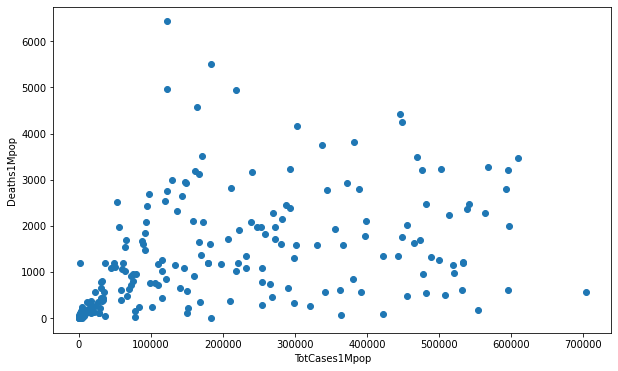

In [13]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df_covid['TotCases1Mpop'], df_covid['Deaths1Mpop'])
ax.set_xlabel('TotCases1Mpop')
ax.set_ylabel('Deaths1Mpop')
plt.show()

In [14]:
df_covid.corr()

,TotalCases,TotalDeath,NewDeath,TotalRecovered,ActiveCases,SeriousCritical,TotCases1Mpop,Deaths1Mpop,TotalTests,Tests1Mpop,Population
TotalCases,1.000000,0.889821,0.165056,0.996740,0.802466,0.484879,0.142363,0.209035,0.857337,0.054866,0.391750
TotalDeath,0.889821,1.000000,0.000129,0.886165,0.653493,0.693340,0.019950,0.283525,0.784378,-0.005599,0.417830
NewDeath,0.165056,0.000129,1.000000,0.163633,0.211361,0.028839,0.094899,-0.046224,-0.010928,-0.043550,0.017740
TotalRecovered,0.996740,0.886165,0.163633,1.000000,0.796934,0.479804,0.154781,0.209693,0.857449,0.062797,0.391380
ActiveCases,0.802466,0.653493,0.211361,0.796934,1.000000,0.390327,0.145193,0.162223,0.580687,0.022644,0.154744
SeriousCritical,0.484879,0.693340,0.028839,0.479804,0.390327,1.000000,-0.068646,0.143344,0.265788,-0.064751,0.200468
TotCases1Mpop,0.142363,0.019950,0.094899,0.154781,0.145193,-0.068646,1.000000,0.461809,0.087339,0.551337,-0.139920
Deaths1Mpop,0.209035,0.283525,-0.046224,0.209693,0.162223,0.143344,0.461809,1.000000,0.151527,0.209408,-0.076359
TotalTests,0.857337,0.784378,-0.010928,0.857449,0.580687,0.265788,0.087339,0.151527,1.000000,0.204401,0.541312
Tests1Mpop,0.054866,-0.005599,-0.043550,0.062797,0.022644,-0.064751,0.551337,0.209408,0.204401,1.000000,-0.087775


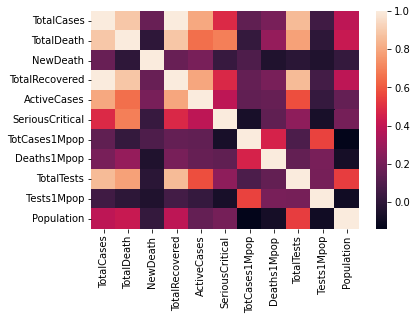

In [15]:
sns.heatmap(df_covid.corr())

I present five countries with most cases and most death. Interestingly, I found that the bigger population isn't really contribute to the amount of cases which is shown by the correlation Total Cases vs  Population = 0.391750.